In [2]:
! pip install numpy pandas matplotlib seaborn sklearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Part (A) Feature Selection

In [5]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

X_valid = pd.read_csv("X_valid.csv",
                          skiprows = 3,
                          header = None)

#combine header and the data together
X_train.columns = X_header
X_valid.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [6]:
X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,1:]
X_feat_valid=X_valid.iloc[:,1:]
print(X_id.shape)
print(X_feat.shape)

(16760,)
(16760, 7488)


In [7]:
### Note: #3 is new
#Three principle to conduct the features Selection
    #1. Only select the features mean of the variable by time
    #2. Only select the either one feature among the features group with low covariance (< 0.9)
    #3. Only select the K-highest-F-score features that yield the highest R^2 under Multiple Linear Regression model

In [8]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_feat = featureSelectByMean(X_feat,df_X_header)
X_feat_valid=featureSelectByMean(X_feat_valid,df_X_header)

X_feat.describe()

Select features with mean value:
Original: 7488 	Selected: 2496
Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [9]:
X_feat_column=list(X_feat.columns)
##replace all the 0 to NaN --> To aviod 0 counted in the mean calculation
X_feat=X_feat.replace(0,np.NaN)

In [20]:
##To chaange all the NaN to their column mean 
def replace_zero (X_feat):
    for i in list(X_feat.columns):
        current_mean=X_feat[i].mean()
        X_feat[i]=X_feat[i].replace(np.NaN,current_mean)

replace_zero(X_feat)

X_feat.describe()

       alanine aminotransferase&mean&1  alanine aminotransferase&mean&2  \
0                            -0.254460                        -0.254460   
1                            -0.256599                        -0.256599   
2                            -0.269432                        -0.269432   
3                            -0.141552                        -0.140184   
4                            -0.141552                        -0.140184   
...                                ...                              ...   
16755                        -0.141552                        -0.140184   
16756                        -0.141552                        -0.140184   
16757                        -0.260876                        -0.260876   
16758                        -0.141552                        -0.140184   
16759                        -0.243765                        -0.243765   

       alanine aminotransferase&time_since_measured&0  albumin&mean&1  \
0                         

In [11]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_feat = featureSelectByCorr(X_feat,0.9)
X_feat.describe()

#Here we get the selected column 
X_feat_valid=X_feat_valid[X_feat.columns]
replace_zero(X_feat_valid)
X_feat_valid.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 401


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,...,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,-0.066667,-0.066893,33.901003,0.022716,49.026316,-0.000362,4273.263158,-0.001298,4381.100668,0.001462,...,1491.177527,0.001057,-0.014614,62.939432,-0.001093,-0.022048,25.472431,-0.017900,-0.003661,281.375104
std,0.401581,0.393143,41.917444,0.608083,55.735793,0.036359,3450.757110,0.049760,3768.508829,0.110882,...,1243.422001,0.146470,0.565066,71.922807,0.086104,0.831230,30.059925,0.638011,0.341491,366.311074
min,-0.279057,-0.279057,0.000000,-3.131888,0.000000,-0.840928,0.000000,-1.683934,1.000000,-0.561162,...,0.000000,-0.665609,-0.366371,0.000000,-1.212709,-3.517696,0.000000,-1.160785,-0.303768,0.000000
25%,-0.247375,-0.246974,0.000000,0.000000,11.000000,0.000000,1440.750000,0.000000,1161.750000,0.000000,...,456.000000,0.000000,0.000000,10.000000,0.000000,-0.452504,2.000000,-0.396079,0.000000,53.000000
50%,0.000000,0.000000,23.000000,0.000000,26.000000,0.000000,3601.500000,0.000000,3649.500000,0.000000,...,1177.000000,0.000000,0.000000,39.000000,0.000000,0.000000,21.000000,-0.125635,0.000000,145.500000
75%,0.000000,0.000000,48.000000,0.000000,71.000000,0.000000,6371.250000,0.000000,6560.750000,0.000000,...,2255.000000,0.000000,0.000000,89.750000,0.000000,0.164838,30.000000,0.247392,0.000000,351.750000
max,9.600536,9.600536,300.000000,3.492301,382.000000,1.098700,14342.000000,0.985636,15392.000000,5.313097,...,5207.000000,3.025795,8.913147,478.000000,1.594580,6.688082,216.000000,13.340637,12.356220,2345.000000


In [12]:
#further adjust Y

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")
#Y_train = Y_train.iloc[:,1:].to_numpy()
#Y_train = Y_train.ravel()
#Y_valid = Y_valid.iloc[:,1:].to_numpy()
#Y_valid = Y_valid.ravel()

#print(Y_train.iloc[:,1])


In [13]:
#Standardlization of features
#Here we adopt standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_feat)
X_feat_std=scaler.transform(X_feat)
X_feat_valid_std=scaler.transform(X_feat_valid)


In [14]:
#def totalFeatureSelected(X_header, df_selected,X_test):
    #cols = np.full(len(X_header), False, dtype = bool)
    #for i in range(len(X_header)):
        #if X_header[i] in df_selected.columns:
            #cols[i] = True
    #return X_test.iloc[:,cols]

#X_valid_selected = totalFeatureSelected(X_header, X_feat,X_valid)
#X_valid_selected.columns = X_feat.columns
#print(X_valid.shape)
#print(X_valid_selected.shape)

In [15]:
#Check the shape of the datasets

print(X_feat_std.shape)
print(X_feat_valid_std.shape)
print(Y_train.shape)
print(Y_valid.shape)

(16760, 401)
(2394, 401)
(16760, 2)
(2394, 2)


Feature 0: 0.014712
Feature 1: 0.018317
Feature 2: 2.415431
Feature 3: 151.335662
Feature 4: 1.196545
Feature 5: 1.312398
Feature 6: 0.916931
Feature 7: 0.025215
Feature 8: 1.044492
Feature 9: 0.076064
Feature 10: 6.726820
Feature 11: 0.207650
Feature 12: 43.461277
Feature 13: 2.211620
Feature 14: 1.977538
Feature 15: 1.658021
Feature 16: 3.375085
Feature 17: 6.899082
Feature 18: 2.895213
Feature 19: 10.997812
Feature 20: 130.919055
Feature 21: 1.758944
Feature 22: 24.522183
Feature 23: 7.420775
Feature 24: 26.665308
Feature 25: 15.813286
Feature 26: 0.296226
Feature 27: 0.211624
Feature 28: 0.624387
Feature 29: 3.777147
Feature 30: 0.122871
Feature 31: 0.162060
Feature 32: 1.463306
Feature 33: 3.019068
Feature 34: 2.719652
Feature 35: 2.779536
Feature 36: 1.752621
Feature 37: 3.375976
Feature 38: 1.236560
Feature 39: 1.082446
Feature 40: 0.641276
Feature 41: 0.371149
Feature 42: 0.079476
Feature 43: 0.000301
Feature 44: 0.062474
Feature 45: 1.079722
Feature 46: 1.943955
Feature 47: 4.

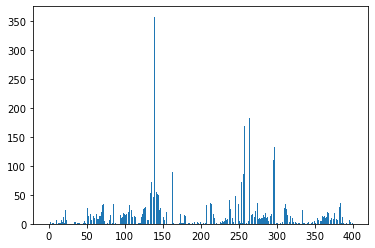

In [16]:
#Task 2 MLR

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot


def select_features(X_train, y_train, X_test, k):
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_feat_fs = fs.transform(X_train)
    # transform test input data
    X_valid_fs = fs.transform(X_test)
    return X_feat_fs, X_valid_fs, fs

# configure to select all the features
X_feat_fs, X_valid_fs, fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,'all')

# computing F-scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the F-scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [17]:
#Check number of features with F-scores >= a certain value

fs_more_than_50 = 0
fs_more_than_40 = 0
fs_more_than_30 = 0
fs_more_than_20 = 0
fs_more_than_10 = 0

for i in range(len(fs.scores_)):
    if fs.scores_[i] >= 50:
        fs_more_than_50 += 1
    if fs.scores_[i] >= 40:
        fs_more_than_40 += 1
    if fs.scores_[i] >= 30:
        fs_more_than_30 += 1
    if fs.scores_[i] >= 20:
        fs_more_than_20 += 1
    if fs.scores_[i] >= 10:
        fs_more_than_10 += 1
    else:
        continue
        
print("No. of features with F-score >= 50:", fs_more_than_50,
     "\nNo. of features with F-score >= 40:", fs_more_than_40,
     "\nNo. of features with F-score >= 30:", fs_more_than_30,
     "\nNo. of features with F-score >= 20:", fs_more_than_20,
     "\nNo. of features with F-score >= 10:", fs_more_than_10)

No. of features with F-score >= 50: 25 
No. of features with F-score >= 40: 32 
No. of features with F-score >= 30: 45 
No. of features with F-score >= 20: 79 
No. of features with F-score >= 10: 155


In [18]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import PolynomialFeatures

#X_feat_fs, X_valid_fs, fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,32)
#print(X_feat_fs.shape)
#print(X_feat_valid_std.shape)

#Polynomial features
#poly = PolynomialFeatures(degree=2, interaction_only=False)
#poly_X_feat = poly.fit_transform(X_feat_fs)
#poly_X_valid = poly.fit_transform(X_valid_fs)
#print(poly_X_feat.shape)
#print(poly_X_valid.shape)

#fit data with selected K features to model
#model = LinearRegression()
#model.fit(poly_X_feat, Y_train.iloc[:,1])
#Y_pred = model.predict(poly_X_valid)

#evaluate predictions
#print("For k = 155:")
#print("R^2 score:", model.score(poly_X_valid, Y_valid.iloc[:,1]))
#print("RMSE:", np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))



For k = all :
R^2 score: 0.0650159842712793
RMSE: 1.9283768696756058
For k = 155 :
R^2 score: 0.0670025952211315
RMSE: 1.9263271171379455
For k = 79 :
R^2 score: 0.06677530270534082
RMSE: 1.9265617443038796
For k = 45 :
R^2 score: 0.06349259551337982
RMSE: 1.9299472024128805
For k = 32 :
R^2 score: 0.06394015089902327
RMSE: 1.929485987967513
For k = 25 :
R^2 score: 0.058716414876978984
RMSE: 1.9348623016635154
For k = 5 :
R^2 score: 0.03932047928960647
RMSE: 1.9546953813809105


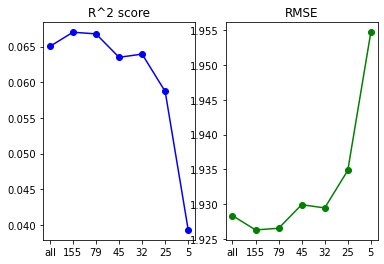

In [21]:
#Fit MLR without polynomial features

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

k_val_list = ['all', 155, 79, 45, 32, 25] #all = 401
R2_score = []
RMSE_list = []
for k_val in range(len(k_val_list)):
    X_feat_fs, X_valid_fs, fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,k_val_list[k_val])
    #fit data with selected K features to model
    model = LinearRegression()
    model.fit(X_feat_fs, Y_train.iloc[:,1])
    Y_pred = model.predict(X_valid_fs)
    #Polynomial features
    #poly = PolynomialFeatures(degree=2, interaction_only=False)
    #poly_X_feat = poly.fit_transform(X_feat_fs)
    #poly_X_valid = poly.fit_transform(X_valid_fs)
    #print(poly_X_feat.shape)
    #print(poly_X_valid.shape)
    #fit data with selected K features to model
    #model = LinearRegression()
    #model.fit(X_feat_fs, Y_train.iloc[:,1])
    #Y_pred = model.predict(X_valid_fs)
    #evaluate predictions
    print("For k =", k_val_list[k_val], ":")
    print("R^2 score:", model.score(X_valid_fs, Y_valid.iloc[:,1]))
    R2_score.append(model.score(X_valid_fs, Y_valid.iloc[:,1]))
    print("RMSE:", np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))
    RMSE_list.append(np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))

fig, ax = plt.subplots(1,2)
ax[0].plot(k_val_list, R2_score, marker='o', color='b')
ax[0].title.set_text('R^2 score')
ax[1].plot(k_val_list, RMSE_list, marker='o', color='g')
ax[1].title.set_text('RMSE')

In [ ]:
#Fit MLR with polynomial features

poly_R2_score = []
poly_RMSE_list = []

for k_val in range(len(k_val_list)):
    X_feat_fs, X_valid_fs, fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,k_val_list[k_val])
    #Polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=False)
    poly_X_feat = poly.fit_transform(X_feat_fs)
    poly_X_valid = poly.fit_transform(X_valid_fs)
    #print(poly_X_feat.shape)
    #print(poly_X_valid.shape)
    #fit data with selected K features to model
    model = LinearRegression()
    model.fit(poly_X_feat, Y_train.iloc[:,1])
    poly_Y_pred = model.predict(poly_X_valid)
    #evaluate predictions
    print("For k =", k_val_list[k_val], ":")
    print("R^2 score:", model.score(poly_X_valid, Y_valid.iloc[:,1]))
    R2_score.append(model.score(poly_X_valid, Y_valid.iloc[:,1]))
    print("RMSE:", np.sqrt(mean_squared_error(Y_valid.iloc[:,1], poly_Y_pred)))
    RMSE_list.append(np.sqrt(mean_squared_error(Y_valid.iloc[:,1], poly_Y_pred)))

fig, ax = plt.subplots(1,2)
ax[0].plot(k_val_list, R2_score, marker='o', color='b')
ax[0].title.set_text('R^2 score')
ax[1].plot(k_val_list, RMSE_list, marker='o', color='g')
ax[1].title.set_text('RMSE')

For k = all :
R^2: -0.9615783695249835
RMSE: 2.7931396659962826
For k = 155 :
R^2: -0.5185020954734916
RMSE: 2.457522587629385
For k = 79 :
R^2: -0.2799977267232838
RMSE: 2.256287407661034
For k = 45 :
R^2: -0.17891268969773888
RMSE: 2.1653626510918085
For k = 32 :
R^2: -0.06531926937299692
RMSE: 2.0583997085815953
For k = 25 :
R^2: -1.0443609437249535e-05
RMSE: 1.9943073425644915
For k = 5 :
R^2: 0.08397112440598253
RMSE: 1.9087295734343168


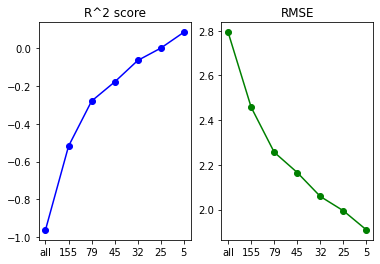

In [31]:
#Deep Neural Network
#without polynomial features
from sklearn.neural_network import MLPRegressor

nw_R2_score = []
nw_RMSE_list = []

for k_val in range(len(k_val_list)):
    X_feat_fs, X_valid_fs, fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,k_val_list[k_val])
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_feat_fs, Y_train.iloc[:,1])
    regr_Y_pred = regr.predict(X_valid_fs)
    print("For k =", k_val_list[k_val], ":")
    r2 = regr.score(X_valid_fs, Y_valid.iloc[:,1])
    print("R^2:", r2)
    nw_R2_score.append(r2)
    RMSE = np.sqrt(mean_squared_error(Y_valid.iloc[:,1], regr_Y_pred))
    print("RMSE:", RMSE)
    nw_RMSE_list.append(RMSE)

fig, ax = plt.subplots(1,2)
ax[0].plot(k_val_list, nw_R2_score, marker='o', color='b')
ax[0].title.set_text('R^2 score')
ax[1].plot(k_val_list, nw_RMSE_list, marker='o', color='g')
ax[1].title.set_text('RMSE')

For k = 25 :
R^2: -0.18982886485434936
RMSE: 2.175364669088929
For k = 20 :
R^2: -0.17371340306313754
RMSE: 2.1605824915300675
For k = 15 :
R^2: 0.028558188460862444
RMSE: 1.9656139078937866
For k = 10 :
R^2: 0.06693362349081555
RMSE: 1.9263983175820085
For k = 5 :
R^2: 0.07865829868229302
RMSE: 1.9142567389206133


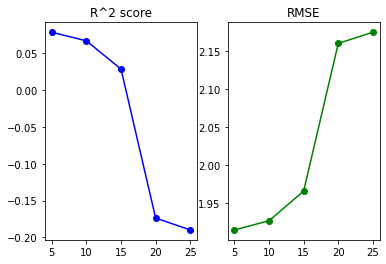

In [34]:
#Deep Neural Network
#with polynomial features
from sklearn.neural_network import MLPRegressor

nw_k_list = [25, 20, 15, 10, 5]
polynw_R2_score = []
polynw_RMSE_list = []

for k_val in range(len(nw_k_list)):
    X_feat_fs, X_valid_fs, fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,nw_k_list[k_val])
    #Polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=False)
    poly_X_feat = poly.fit_transform(X_feat_fs)
    poly_X_valid = poly.fit_transform(X_valid_fs)
    regr = MLPRegressor(random_state=1, max_iter=500).fit(poly_X_feat, Y_train.iloc[:,1])
    regr_Y_pred = regr.predict(poly_X_valid)
    print("For k =", nw_k_list[k_val], ":")
    r2 = regr.score(poly_X_valid, Y_valid.iloc[:,1])
    print("R^2:", r2)
    polynw_R2_score.append(r2)
    RMSE = np.sqrt(mean_squared_error(Y_valid.iloc[:,1], regr_Y_pred))
    print("RMSE:", RMSE)
    polynw_RMSE_list.append(RMSE)

fig, ax = plt.subplots(1,2)
ax[0].plot(nw_k_list, polynw_R2_score, marker='o', color='b')
ax[0].title.set_text('R^2 score')
ax[1].plot(nw_k_list, polynw_RMSE_list, marker='o', color='g')
ax[1].title.set_text('RMSE')

(16760, 401)
(2394, 401)
(16760, 2)
[ 6.84187532  7.18533469  5.58824248 ... -0.06556364  2.05018272
  3.13692069]
